In [43]:
import pandas as pd

In [44]:
client_data = pd.read_csv('clean_data_after_eda.csv')
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [45]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [46]:
client_data.drop(columns=['id', 'channel_sales'], axis=1, inplace=True)

In [47]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cons_12m                        14606 non-null  int64  
 1   cons_gas_12m                    14606 non-null  int64  
 2   cons_last_month                 14606 non-null  int64  
 3   date_activ                      14606 non-null  object 
 4   date_end                        14606 non-null  object 
 5   date_modif_prod                 14606 non-null  object 
 6   date_renewal                    14606 non-null  object 
 7   forecast_cons_12m               14606 non-null  float64
 8   forecast_cons_year              14606 non-null  int64  
 9   forecast_discount_energy        14606 non-null  float64
 10  forecast_meter_rent_12m         14606 non-null  float64
 11  forecast_price_energy_off_peak  14606 non-null  float64
 12  forecast_price_energy_peak      

In [48]:
# Convert date columns to datetime
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'])
client_data['date_end'] = pd.to_datetime(client_data['date_end'])

# Extract year, month, day
client_data['activation_year'] = client_data['date_activ'].dt.year
client_data['activation_month'] = client_data['date_activ'].dt.month
client_data['activation_day'] = client_data['date_activ'].dt.day

# Calculate contract duration in days
client_data['contract_duration_days'] = (client_data['date_end'] - client_data['date_activ']).dt.days


In [49]:
# Price difference between peak and off-peak prices
client_data['price_diff_6m_peak_off_peak'] = client_data['var_6m_price_peak'] - client_data['var_6m_price_off_peak']
client_data['price_diff_year_peak_off_peak'] = client_data['var_year_price_peak'] - client_data['var_year_price_off_peak']


In [50]:
# Convert 'has_gas' to binary
client_data['has_gas'] = client_data['has_gas'].apply(lambda x: 1 if x == 't' else 0)


In [51]:
# Convert date columns to datetime
client_data['date_modif_prod'] = pd.to_datetime(client_data['date_modif_prod'])
client_data['date_renewal'] = pd.to_datetime(client_data['date_renewal'])

# Extract year, month, day for date_modif_prod
client_data['modif_prod_year'] = client_data['date_modif_prod'].dt.year
client_data['modif_prod_month'] = client_data['date_modif_prod'].dt.month
client_data['modif_prod_day'] = client_data['date_modif_prod'].dt.day

# Extract year, month, day for date_renewal
client_data['renewal_year'] = client_data['date_renewal'].dt.year
client_data['renewal_month'] = client_data['date_renewal'].dt.month
client_data['renewal_day'] = client_data['date_renewal'].dt.day

# Calculate time difference between product modification and contract end/renewal
client_data['days_since_modif_prod'] = (client_data['date_end'] - client_data['date_modif_prod']).dt.days
client_data['days_until_renewal'] = (client_data['date_renewal'] - pd.to_datetime('today')).dt.days


In [52]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cons_12m                        14606 non-null  int64         
 1   cons_gas_12m                    14606 non-null  int64         
 2   cons_last_month                 14606 non-null  int64         
 3   date_activ                      14606 non-null  datetime64[ns]
 4   date_end                        14606 non-null  datetime64[ns]
 5   date_modif_prod                 14606 non-null  datetime64[ns]
 6   date_renewal                    14606 non-null  datetime64[ns]
 7   forecast_cons_12m               14606 non-null  float64       
 8   forecast_cons_year              14606 non-null  int64         
 9   forecast_discount_energy        14606 non-null  float64       
 10  forecast_meter_rent_12m         14606 non-null  float64       
 11  fo

In [53]:
client_data['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [54]:
client_data.drop(columns=['origin_up', 'date_activ', 'date_end', 'date_renewal', 'date_modif_prod'], axis=1, inplace=True)

In [55]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cons_12m                        14606 non-null  int64  
 1   cons_gas_12m                    14606 non-null  int64  
 2   cons_last_month                 14606 non-null  int64  
 3   forecast_cons_12m               14606 non-null  float64
 4   forecast_cons_year              14606 non-null  int64  
 5   forecast_discount_energy        14606 non-null  float64
 6   forecast_meter_rent_12m         14606 non-null  float64
 7   forecast_price_energy_off_peak  14606 non-null  float64
 8   forecast_price_energy_peak      14606 non-null  float64
 9   forecast_price_pow_off_peak     14606 non-null  float64
 10  has_gas                         14606 non-null  int64  
 11  imp_cons                        14606 non-null  float64
 12  margin_gross_pow_ele            

In [56]:
X = client_data.drop(columns=['churn'])  # All columns except 'churn'
y = client_data['churn']  # Target variable

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit(X_test)

StandardScaler()

In [62]:
rfc = RandomForestClassifier(random_state=42)
model = rfc.fit(X_train, y_train)

In [63]:
importances = model.feature_importances_

In [65]:
feature_names = X.columns.tolist()
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [70]:
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [71]:
import matplotlib.pyplot as plt

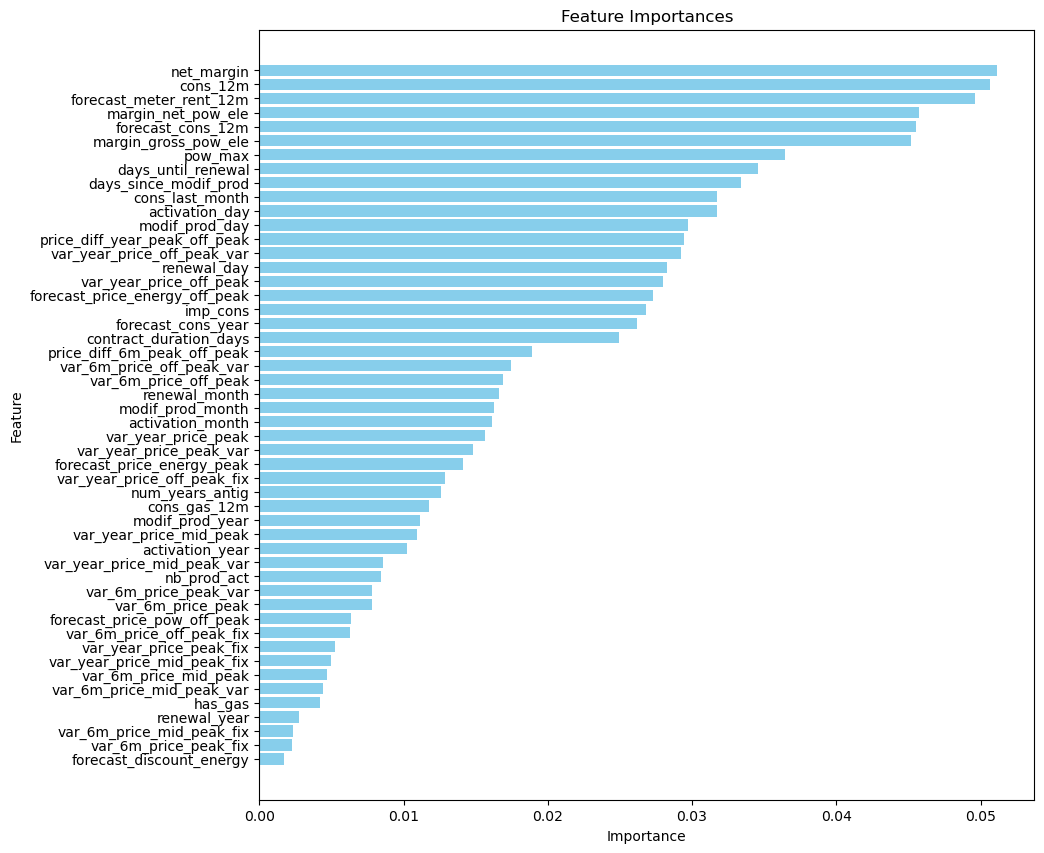

In [72]:
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()

In [75]:
top_n = 10
selected_features = feature_importance_df.head(top_n)['Feature'].values

In [76]:
X_selected = client_data[selected_features]
y = client_data['churn']  # Target variable

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 4. Scaling the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train a model using the selected features (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [85]:
# 6. Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [86]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [87]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.9106776180698152
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.81      0.11      0.19       284

    accuracy                           0.91      2922
   macro avg       0.86      0.55      0.57      2922
weighted avg       0.90      0.91      0.88      2922

ROC AUC Score:  0.7001923405482173
Confusion Matrix:
 [[2631    7]
 [ 254   30]]


In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
# 4. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 6. Train a model using the resampled data (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# 7. Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 8. Evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.8555783709787816
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2638
           1       0.27      0.29      0.28       284

    accuracy                           0.86      2922
   macro avg       0.60      0.60      0.60      2922
weighted avg       0.86      0.86      0.86      2922

ROC AUC Score:  0.6833755565996433
Confusion Matrix:
 [[2417  221]
 [ 201   83]]
